In [1]:
import pandas as pd

In [2]:
parentDir = "D:/CDAC/IACSD/Project/"
X_train = pd.read_csv(parentDir + 'life_expectancy/imp/X_train.csv').values
X_test = pd.read_csv(parentDir + 'life_expectancy/imp/X_test.csv').values
Y_train = pd.read_csv(parentDir + 'life_expectancy/imp/Y_train.csv').values
Y_test = pd.read_csv(parentDir + 'life_expectancy/imp/Y_test.csv').values

# Create evaluation function
This function will calculate mean squared error (MSE) , mean absolute error (MAE) and R2 score

In [3]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred) #pe
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

# Apply Random Forest Grid search

In [4]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(oob_score = True)

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
# param grid is dictionary 
# key --> name of parameter to be tuned
# value --> list of values which you want to check 
param_grid = { 
    'n_estimators' : [50, 200, 500], # number of trees in the random forest
    'criterion' : ['squared_error', 'absolute_error', 'poisson'], #The function to measure the quality of a split. 
    'max_depth' :[3, 5, 7], # maximum number of levels allowed in each decision tree
    'max_features' : ['sqrt', 'log2'], # number of features in consideration at every split
    'max_samples' : [0.7, 0.8, 0.9] #
}

In [7]:
gscv =GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, verbose =2)

In [8]:
gscv.fit(X_train,Y_train.ravel())

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=200; total time=   0.8s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=200; total time=   0.8s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=500; total time=   2.1s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.7, n_estimators=500; total time=   2.2s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=3, max_features=sqrt, max_samples=0.8, n_estimators=50; 

[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=200; total time=   1.2s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=200; total time=   1.2s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=500; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=500; total time=   3.2s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   0.3s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   0.3s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, max_samples=0.7, n_estimators=200; total time=   1.4s
[CV] END criterion=squared_error, max_depth=7, max_features=sqrt, max_samples=0.7, n_estimators=200; total time=   1.5s
[CV] END criterion=squared_error, max_dept

[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.8, n_estimators=500; total time=  54.9s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.9, n_estimators=50; total time=   6.1s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.9, n_estimators=50; total time=   6.3s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.9, n_estimators=200; total time=  24.6s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.9, n_estimators=200; total time=  25.6s
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.9, n_estimators=500; total time= 1.1min
[CV] END criterion=absolute_error, max_depth=3, max_features=log2, max_samples=0.9, n_estimators=500; total time= 1.0min
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, max_samples=0.7, n_estimators=50; total time=   5.4s
[CV] END criterion=absolute_error, 

[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.8, n_estimators=50; total time=   5.1s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.8, n_estimators=200; total time=  21.2s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.8, n_estimators=200; total time=  21.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.8, n_estimators=500; total time=  55.6s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.8, n_estimators=500; total time=  45.8s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.9, n_estimators=50; total time=   5.0s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.9, n_estimators=50; total time=   5.2s
[CV] END criterion=absolute_error, max_depth=7, max_features=log2, max_samples=0.9, n_estimators=200; total time=  19.9s
[CV] END criterion=absolute_error, 

[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.8, n_estimators=50; total time=   0.3s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.8, n_estimators=200; total time=   1.3s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.8, n_estimators=200; total time=   1.1s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.8, n_estimators=500; total time=   2.9s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.8, n_estimators=500; total time=   4.4s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=50; total time=   0.2s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=50; total time=   0.2s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=200; total time=   1.1s
[CV] END criterion=poisson, max_depth=5, max_features=log2, max_samples=0.9, n_estimators=2

GridSearchCV(cv=2, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'max_samples': [0.7, 0.8, 0.9],
                         'n_estimators': [50, 200, 500]},
             verbose=2)

In [9]:
gscv_param = gscv.best_params_

### Create the model based on best params

In [10]:
# create a RF regressor
rf = RandomForestRegressor(oob_score = True, criterion = gscv_param['criterion'], max_depth = gscv_param['max_depth'], 
                           max_features = gscv_param['max_features'], max_samples = gscv_param['max_samples'], 
                           n_estimators = gscv_param['n_estimators'])
rf.fit(X_train,Y_train.ravel())

RandomForestRegressor(criterion='absolute_error', max_depth=7,
                      max_features='sqrt', max_samples=0.9, n_estimators=50,
                      oob_score=True)

In [11]:
Y_pred_rf = rf.predict(X_test)

# Apply XGBoost (from SKlearn) Grid Search 

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
xgbc = GradientBoostingRegressor(random_state = 7)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# param grid is dictionary 
# key --> name of parameter to be tuned
# value --> list of values which you want to check 
param_grid = { 
    'learning_rate' : [0.01, 0.03],
    'n_estimators' : [50, 200, 500, 700],
    'max_depth' :[3, 5, 7, 9]
}

In [15]:
gscv = GridSearchCV(estimator = xgbc, param_grid = param_grid, cv = 2, verbose = 2)

In [16]:
gscv.fit(X_train,Y_train.ravel())

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   4.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   4.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   5.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=700; total time=   5.8s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=7),
             param_grid={'learning_rate': [0.01, 0.03],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 200, 500, 700]},
             verbose=2)

In [17]:
gscv_param = gscv.best_params_

### Create the model based on best params

In [18]:
# create a GB regressor
gbr = GradientBoostingRegressor(random_state = 7, learning_rate = gscv_param['learning_rate'], 
                                max_depth = gscv_param['max_depth'], n_estimators = gscv_param['n_estimators'])
gbr.fit(X_train,Y_train.ravel())

GradientBoostingRegressor(learning_rate=0.03, max_depth=7, n_estimators=700,
                          random_state=7)

In [19]:
Y_pred_gbr = gbr.predict(X_test)

# Compare the models

1. Compare the mse, mae, r2 score

2. compare the plots

**Evaluation of Random Forest Regressor** 

In [20]:
# RF model evaluation
# calculate mean squared error (MSE) , mean absolute error (MAE) and R2 score for RF regressor.

r2, mse, mae = eval_fun(Y_test, Y_pred_rf) 
print("r2 score = ", r2, "mse = ", mse, " mae = ", mae)

r2 score =  0.8978497103502754 mse =  8.818040628836993  mae =  2.223703360717184


**Evaluation of Gradient Boosting Regressor** 

In [21]:
# XG Boost model evaluation
# calculate mean squared error (MSE) , mean absolute error (MAE) and R2 score for GB regressor.

r2, mse, mae = eval_fun(Y_test,Y_pred_gbr) 
print("r2 score = ", r2, "mse = ", mse, " mae = ", mae)

r2 score =  0.9668021874436133 mse =  2.8657741540875024  mae =  1.1408263426147374


Plot the results of regression and compare

In [22]:
res = pd.DataFrame( { "Y_test": Y_test.ravel(), "Y_predicted_rf": Y_pred_rf, "Y_predicted_gbr": Y_pred_gbr } )
res.shape

(1986, 3)

<AxesSubplot:>

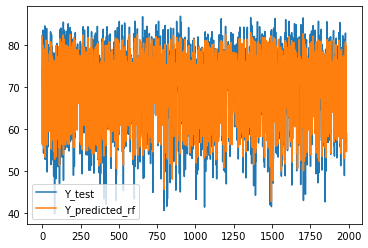

In [23]:
res[['Y_test', 'Y_predicted_rf']].plot()

<AxesSubplot:>

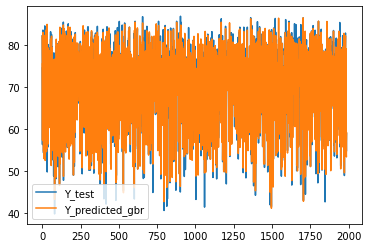

In [24]:
res[['Y_test', 'Y_predicted_gbr']].plot()

<AxesSubplot:>

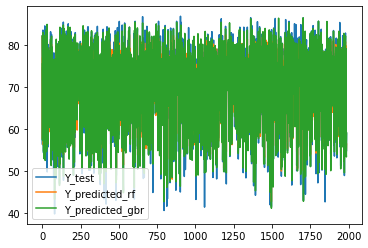

In [25]:
res = pd.DataFrame( { "Y_test": Y_test.ravel(), "Y_predicted_rf": Y_pred_rf, "Y_predicted_gbr": Y_pred_gbr } )
res.plot()